# Homework 3
## Professor Nathan Kutz
## EE399 
## By: Gerin George

Not sure if this is needed, but just in case again, here is the link to my private repo: 

https://github.com/gering92/EE399-Work

Click on Homework 3 Writeup to see the writeup.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA




# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = np.array(mnist.data / 255.0) # Normalizes data and puts data in matrix X

X = X.T



In [8]:
# Question 1: 

# Perform SVD on the images
U, S, Vt = np.linalg.svd(X, full_matrices=False)


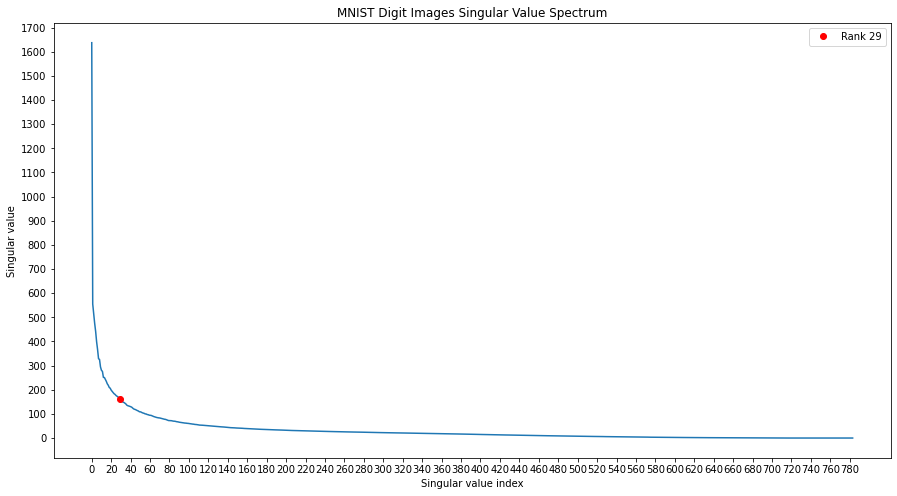

The Singular Values look like an exponential decay.
Rank of digit space: 29


In [9]:
# Question 2: 

#Plot the singular values
fig = plt.figure(figsize=(15, 8))  # set figure size
plt.plot(S)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.xticks(range(0, len(S), 20))  # set x-ticks at intervals of 25
plt.yticks(range(0, 2000, 100))  # set y-ticks at intervals of 100


# Determine the rank r
threshold = 0.1 * S[0]
r = np.sum(S > threshold)

plt.plot(r, S[r], 'ro', label=f'Rank {r}')  # add a red dot at the rank r value and label it

plt.title('MNIST Digit Images Singular Value Spectrum')
plt.legend()
plt.show()

print('The Singular Values look like an exponential decay.')
print('Rank of digit space:', r)

#### Question 3:

The U, &Sigma;, and V matrices represent the factorization of a matrix that undergoes singular value decomposition. 

The U matrix represents the left singular vectors, and span the column space of the matrix A that undergoes SVD.

The V matrix represents the right singular vectors, and span the row space of the matrix A that undergoes SVD. 

The &Sigma; matrix represents the singular values, which are the square roots of the eigenvalues of the matrix A. They indicate the importance of each singular vector in the data, and are sorted in descending order along the diagonal of S. 

In the context of image analysis, the matrix U is a set of basis images that capture the main patterns in the digit images (The original images in the MNIST dataset). A column of U corresponds to a basis image. The matrix V is a set of basis coefficients that determine the contribution of each basis image to a particular digit image. Each row of V corresponds to coefficients of the basis images for a particular digit image. The singular values in the matrix S can be thought of as the importance of each basis image., The larger the singular value in S, the more important the corresponding basis image. 

10


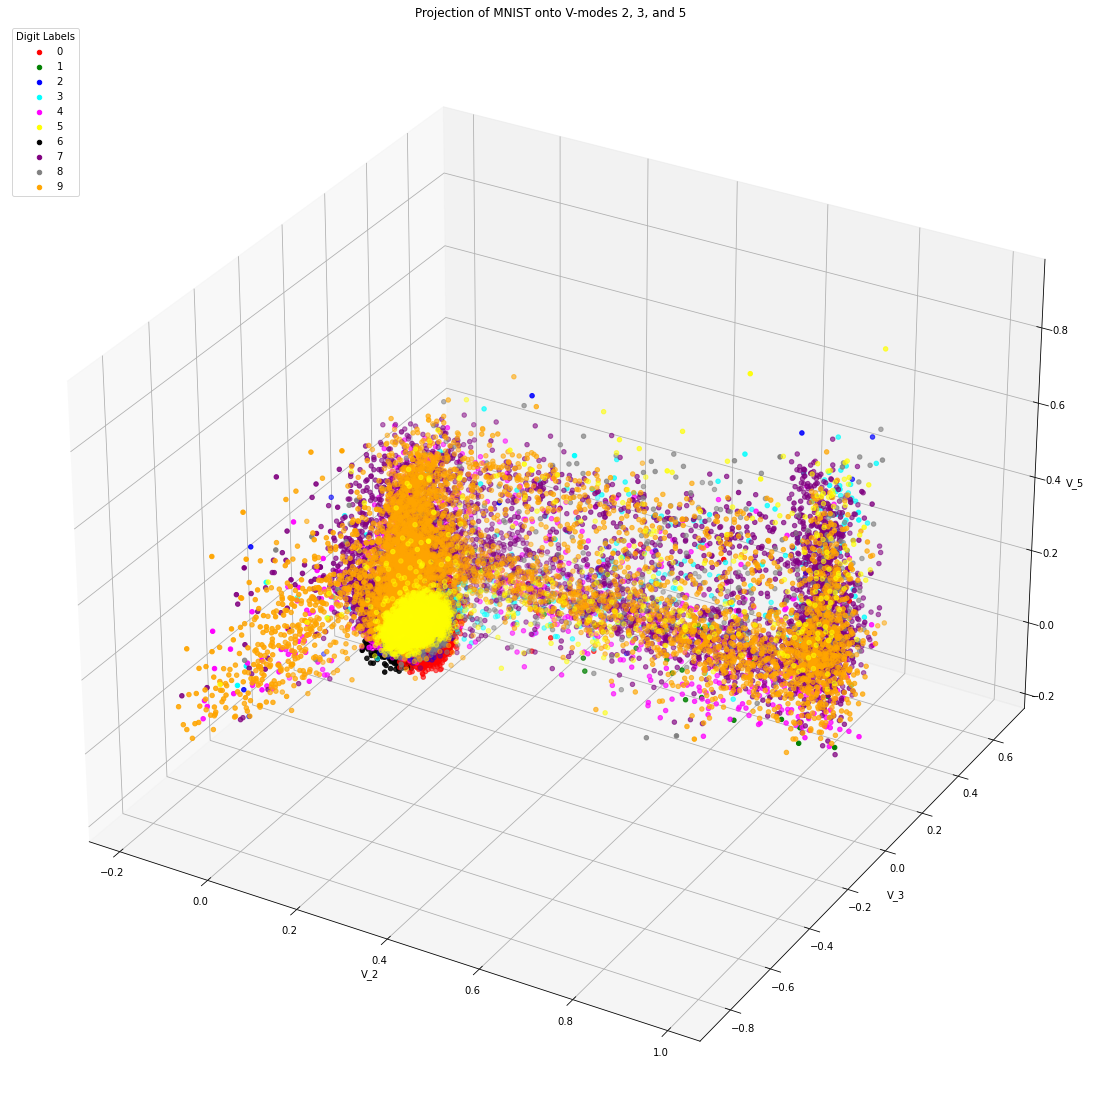

In [10]:
# Question 4:

# Project the data onto the three selected V-modes
V_selected = Vt[:, [1, 2, 4]]
projected_data = (X.T @ V_selected)

y = np.array(mnist.target)

unique_vals = np.unique(y)
num_vals = len(unique_vals)
print(num_vals)

# Plot the scatter plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'gray', 'orange']
for i, val in enumerate(unique_vals):
    mask = np.where(y == val)[0]
    ax.scatter3D(projected_data[mask, 0], projected_data[mask, 1], projected_data[mask, 2], color=colors[i], label=str(val))


# Set the axis labels
ax.set_xlabel('V_2')
ax.set_ylabel('V_3')
ax.set_zlabel('V_5')
ax.set_title('Projection of MNIST onto V-modes 2, 3, and 5')

# Add the legend
ax.legend(loc='upper left', title='Digit Labels')

plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split



# Select two digits to classify (e.g., 3 and 8)
digit1 = '3'
digit2 = '8'


# Use the indices to select the samples and labels
X_selected = X[:, (y == digit1) | (y == digit2)]
y_selected = y[(y == digit1) | (y == digit2)]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected.T, y_selected, test_size=0.2, random_state=42)

# Perform LDA with n_components=1
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

# Get the predicted labels for the test set
training_score = lda.score(X_train, y_train)

test_score = lda.score(X_test, y_test)


# Accuracy of training
print("Training Accuracy: {:.3f}%".format(training_score*100))

# Accuracy of Test data
print("Test Accuracy: {:.3f}%".format(test_score*100))



Training Accuracy: 96.724%
Test Accuracy: 96.528%


In [12]:
# Select two digits to classify (e.g., 3 and 8)
digit1 = '3'
digit2 = '8'
digit3 = '9'


# Use the indices to select the samples and labels
X_selected = X[:, (y == digit1) | (y == digit2) | (y == digit3)]
y_selected = y[(y == digit1) | (y == digit2) | (y == digit3)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected.T, y_selected, test_size=0.2, random_state=42)

# Perform LDA with n_components=1
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

# Get the predicted labels for the test set
training_score = lda.score(X_train, y_train)

test_score = lda.score(X_test, y_test)


# Accuracy of training
print("Training Accuracy: {:.3f}%".format(training_score*100))

# Accuracy of Test data
print("Test Accuracy: {:.3f}%".format(test_score*100))


Training Accuracy: 95.723%
Test Accuracy: 94.719%


In [13]:
from itertools import combinations

# Define the digits to classify
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Get all possible combinations of two digits
digit_pairs = combinations(digits, 2)

# Initialize variables to store max and min test accuracy and their corresponding digit pairs
max_test_accuracy = 0
max_test_accuracy_digits = None
min_test_accuracy = 100
min_test_accuracy_digits = None

for digit_pair in digit_pairs:
    digit1, digit2 = digit_pair
    
    # Select the samples and labels for the current digit pair
    X_selected = X[:, np.isin(y, [digit1, digit2])]
    y_selected = y[np.isin(y, [digit1, digit2])]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected.T, y_selected, test_size=0.2, random_state=42)

    # Perform LDA with n_components=1
    lda = LDA(n_components=1)
    lda.fit(X_train, y_train)

    training_score = lda.score(X_train, y_train)
    # Get the predicted labels for the test set
    test_score = lda.score(X_test, y_test)
    
    print("Digits {} vs {}: Training Accuracy: {:.3f}%".format(digit1, digit2, training_score*100))

    # Print the test accuracy for the current digit pair
    print("Digits {} vs {}: Test Accuracy: {:.3f}%".format(digit1, digit2, test_score*100))
    print('\n')
    
    # Update the max and min test accuracy and their corresponding digit pairs
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        max_test_accuracy_digits = digit_pair
    if test_score < min_test_accuracy:
        min_test_accuracy = test_score
        min_test_accuracy_digits = digit_pair

# Print the max and min test accuracy and their corresponding digit pairs
print("Maximum Test Accuracy: {:.3f}% (Digits {} vs {})".format(max_test_accuracy*100, max_test_accuracy_digits[0], max_test_accuracy_digits[1]))
print("Minimum Test Accuracy: {:.3f}% (Digits {} vs {})".format(min_test_accuracy*100, min_test_accuracy_digits[0], min_test_accuracy_digits[1]))


Digits 0 vs 1: Training Accuracy: 99.476%
Digits 0 vs 1: Test Accuracy: 99.526%


Digits 0 vs 2: Training Accuracy: 98.812%
Digits 0 vs 2: Test Accuracy: 98.633%


Digits 0 vs 3: Training Accuracy: 99.448%
Digits 0 vs 3: Test Accuracy: 98.825%


Digits 0 vs 4: Training Accuracy: 99.681%
Digits 0 vs 4: Test Accuracy: 99.381%


Digits 0 vs 5: Training Accuracy: 98.865%
Digits 0 vs 5: Test Accuracy: 98.487%


Digits 0 vs 6: Training Accuracy: 99.274%
Digits 0 vs 6: Test Accuracy: 98.621%


Digits 0 vs 7: Training Accuracy: 99.674%
Digits 0 vs 7: Test Accuracy: 99.401%


Digits 0 vs 8: Training Accuracy: 98.907%
Digits 0 vs 8: Test Accuracy: 98.689%


Digits 0 vs 9: Training Accuracy: 99.504%
Digits 0 vs 9: Test Accuracy: 98.738%


Digits 1 vs 2: Training Accuracy: 98.613%
Digits 1 vs 2: Test Accuracy: 98.151%


Digits 1 vs 3: Training Accuracy: 99.034%
Digits 1 vs 3: Test Accuracy: 98.169%


Digits 1 vs 4: Training Accuracy: 99.694%
Digits 1 vs 4: Test Accuracy: 99.422%


Digits 1 vs 5: T

The model has the most difficulty distinguishing digits 3 and 5, with a test data accuracy of 95.020%

The model has the least difficulty distinguishing digits 6 and 7, with a test data accuracy of 99.612%

In [14]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an SVM classifier
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

# Fit a decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Fit an LDA model
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

# Make predictions on the test set
svm_preds = svm_clf.predict(X_test)
dt_preds = dt_clf.predict(X_test)
lda_preds = lda.predict(X_test)


# Calculate and print the accuracies
svm_acc = accuracy_score(y_test, svm_preds)
dt_acc = accuracy_score(y_test, dt_preds)
lda_acc = lda.score(X_test, y_test)

print("SVM Accuracy: {:.3f}%".format(svm_acc*100))
print("Decision Tree Accuracy: {:.3f}%".format(dt_acc*100))
print("LDA Accuracy: {:.3f}%".format(lda_acc*100))


SVM Accuracy: 97.643%
Decision Tree Accuracy: 87.143%
LDA Accuracy: 86.771%


In [15]:


# Select the samples and labels for the hardest digit pair (3, 5)
X_selected = X[np.logical_or(y == '3', y == '5')]
y_selected = y[np.logical_or(y == '3', y == '5')]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Fit an SVM classifier
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

# Fit a decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Fit an LDA model
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

# Make predictions on the test set
svm_preds = svm_clf.predict(X_test)
dt_preds = dt_clf.predict(X_test)
lda_preds = lda.predict(X_test)

# Calculate and print the accuracies
svm_acc = accuracy_score(y_test, svm_preds)
dt_acc = accuracy_score(y_test, dt_preds)
lda_acc = lda.score(X_test, y_test)

print("Performance on the Hardest Pair (3, 5):")
print("SVM Accuracy: {:.3f}%".format(svm_acc*100))
print("Decision Tree Accuracy: {:.3f}%".format(dt_acc*100))
print("LDA Accuracy: {:.3f}%".format(lda_acc*100))
print("\n")


# Select the samples and labels for the hardest digit pair (6, 7)
X_selected = X[np.logical_or(y == '6', y == '7')]
y_selected = y[np.logical_or(y == '6', y == '7')]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Fit an SVM classifier
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

# Fit a decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Fit an LDA model
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

# Make predictions on the test set
svm_preds = svm_clf.predict(X_test)
dt_preds = dt_clf.predict(X_test)
lda_preds = lda.predict(X_test)

# Calculate and print the accuracies
svm_acc = accuracy_score(y_test, svm_preds)
dt_acc = accuracy_score(y_test, dt_preds)
lda_acc = lda.score(X_test, y_test)

print("Performance on the Easiest Pair (6, 7):")
print("SVM Accuracy: {:.3f}%".format(svm_acc*100))
print("Decision Tree Accuracy: {:.3f}%".format(dt_acc*100))
print("LDA Accuracy: {:.3f}%".format(lda_acc*100))

Performance on the Hardest Pair (3, 5):
SVM Accuracy: 99.257%
Decision Tree Accuracy: 96.098%
LDA Accuracy: 95.020%


Performance on the Easiest Pair (6, 7):
SVM Accuracy: 100.000%
Decision Tree Accuracy: 99.047%
LDA Accuracy: 99.612%
